In [ ]:
# Import required library for data processing
import torch
import torchvision
from torchvision import datasets, transforms

# Import required library for dataset visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd
import time


# Task 1: Acquire the data

Two image datasets in your experiments: **Fashion MNIST**
and **CIFAR-10**

You can use existing machine learning libraries (such as PyTorch) to load the dataset, and should use
the default train and test partitions.


Note that while working with multilayer perceptrons, after loading the data, you will have to vectorize it so that it has the appropriate dimensions.

Also, do not forget to normalize the training and test set



### Subtask 1: Fashion MNIST Dataset

https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4

https://www.kaggle.com/datasets/zalando-research/fashionmnist/code

In [ ]:
# Define transform to convert images to tensors and normalize

transform_FMNIST = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,),)])

'''
transforms.ToTenser convert PIL image(L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
or numpy.ndarray (H x W x C) in the range [0, 255]
to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
'''

'''
transform.Normalize Normalize a tensor image with mean and standard
deviation. Tensor image size should be (C x H x W) to be normalized
which we already did use transforms.ToTenser.
'''

'\ntransform.Normalize Normalize a tensor image with mean and standard\ndeviation. Tensor image size should be (C x H x W) to be normalized\nwhich we already did use transforms.ToTenser.\n'

In [ ]:
# Step 1: Load train and test datasets

batch_size = 4

FMNIST_training_set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                            download=True,
                                            train=True,
                                            transform=transform_FMNIST)

FMINIST_trainloader = torch.utils.data.DataLoader(FMNIST_training_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)



FMNIST_test_set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                        download=True,
                                        train=False,
                                        transform=transform_FMNIST)

FMINIST_testloader = torch.utils.data.DataLoader(FMNIST_test_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)

'''
torch.utils.data.Dataloader takes our data train or test data with parameter
batch_size and shuffle. batch_size define the how many samples per batch to
load, and shuffle parameter set the True to have the data reshuffled
at every epoch.
'''


100%|██████████| 26421880/26421880 [00:00<00:00, 112531881.57it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6633527.09it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 68223714.37it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21106820.13it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



'\ntorch.utils.data.Dataloader takes our data train or test data with parameter\nbatch_size and shuffle. batch_size define the how many samples per batch to\nload, and shuffle parameter set the True to have the data reshuffled\nat every epoch.\n'

In [ ]:
# The data must be preprocessed before training the network.
# If you inspect the first image in the training set, you will see that the
# pixel values fall in the range of 0 to 255:

# Scale these values to a range of 0 to 1 before feeding them to the neural
# network model. To do so, divide the values by 255. It's important that the
# training set and the testing set be preprocessed in the same way:

FMNIST_training_set.data = FMNIST_training_set.data / 255.0
FMNIST_test_set.data = FMNIST_test_set.data / 255.0

In [ ]:
### Explore dataset

# What does the training data shape look like?

FMNIST_training_set.data.shape, FMNIST_training_set.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

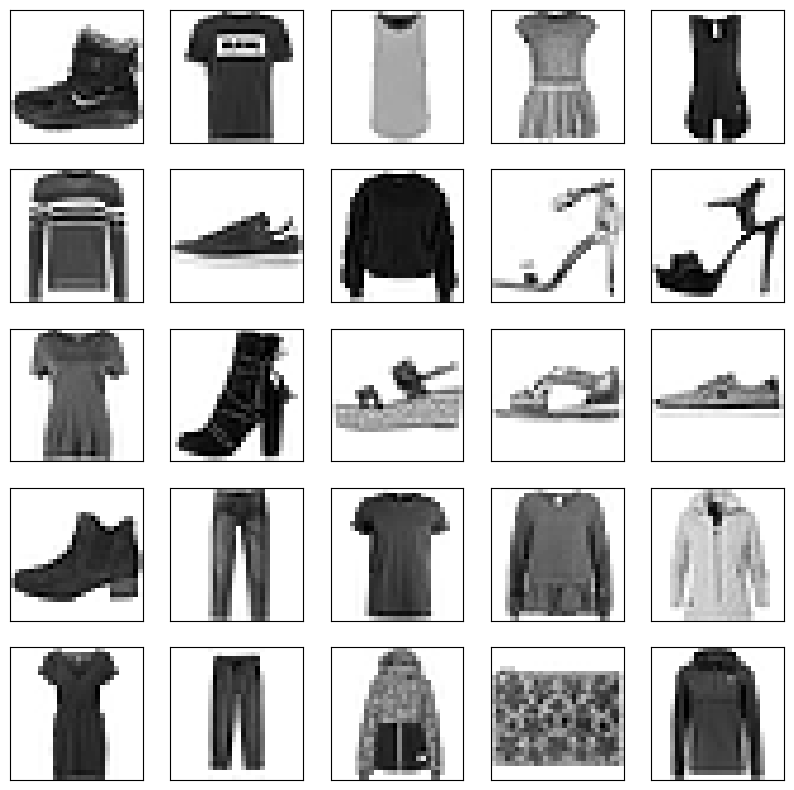

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(FMNIST_training_set.data[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# What does the testing data shape look like?

FMNIST_test_set.data.shape, FMNIST_test_set.targets.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

In [ ]:
# Visualization of an image data

print(f"Visualization of image with target label {FMNIST_training_set.targets[0]}:")

plt.imshow(FMNIST_training_set.data[0].squeeze(0))
plt.show()

Visualization of image with target label 9:


KeyboardInterrupt: ignored

<Figure size 640x480 with 0 Axes>

### Subtask 2: CIFAR-10 Dataset

In [ ]:
transform_CIFAR_10 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
    # Numbers from normalization comes from this link:
    # https://www.kaggle.com/code/fanbyprinciple/cifar10-explanation-with-pytorch
])

batch_size = 4

# Load the CIFAR-10 training set
CIFAR_10_training_set = datasets.CIFAR10('~/.pytorch/CIFAR10_data', download=True, train=True, transform=transform_CIFAR_10)

# Load the CIFAR-10 test set
CIFAR_10_test_set = datasets.CIFAR10('~/.pytorch/CIFAR10_data', download=True, train=False, transform=transform_CIFAR_10)

# Create the data loaders
CIFAR_10_trainloader = torch.utils.data.DataLoader(CIFAR_10_training_set, batch_size=batch_size, shuffle=True, num_workers=2)
CIFAR_10_testloader = torch.utils.data.DataLoader(CIFAR_10_test_set, batch_size=batch_size, shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:05<00:00, 29720274.34it/s]


Extracting /root/.pytorch/CIFAR10_data/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10_data
Files already downloaded and verified


In [ ]:
CIFAR_10_training_set.data.shape

(50000, 32, 32, 3)

In [ ]:
CIFAR_10_training_set.data.reshape(-1,32*32*3).shape


(50000, 3072)

# Task 2: Implement the MLP Layer

An MLP is composed of three types of layers: (1) an input layer, (2) hidden layers, (3) an output layer

You should implement it from scratch based on the code available in the slides

Your implementation should include the backpropagation and the mini-batch gradient descent algorithm used (e.g., SGD)

Summarizing the operation of the perceptron:

- **Step 1**: Initialize the weights and bias with small-randomized values;

- **Step 2**: Propagate all values in the input layer until output layer(Forward Propagation)

- **Step 3**: Update weight and bias in the inner layers(Backpropagation)

- **Step 4**: Do it until that the stop criterion is satisfied !

In [ ]:
FMNIST_training_set.data.shape

torch.Size([60000, 28, 28])

In [ ]:
FMNIST_training_set.targets.shape

torch.Size([60000])

In [ ]:
print(FMNIST_training_set.data.view(-1,28*28).shape)

torch.Size([60000, 784])


In [ ]:
class MLP():

        # Constructor for MLP class
    def __init__(self,
                 training_features, training_label,
                 validation_features, validation_label,
                 num_hidden_layers = 1,
                 num_neurons = 1,
                 l1_lambda = 0,
                 l2_lambda = 0,
                 ):

      # Adds bias term to the training features
      self.training_features = self.add_bias(training_features)

      # Convert integer labels to one-hot encoded labels for training targets        ==> ASSUMING 10 CLASSES
      self.training_label = self.one_hot_encode(training_label, num_classes=10)

      # Add bias term to validation_features
      self.validation_features = self.add_bias(validation_features)

      # Convert integer labels to one-hot encoded labels for validation targets
      self.validation_label = self.one_hot_encode(validation_label, num_classes=10)

      # Initialize number of hidden layers
      self.num_hidden_layers = num_hidden_layers

      # Initialize number of neurons in each layer
      self.num_neurons = num_neurons

      # Get the number of training samples
        # shape[0] gives you the size of the first dimension of the numpy array
      self.num_samples = self.training_features.shape[0]

      #initilise L1 regularization strength.
      self.l1_lambda = l1_lambda

      #initilise L2 regularization strength.
      self.l2_lambda = l2_lambda

      # Defining a list containing size of each layer
      input_layer_size = self.training_features.shape[1]
      hidden_layer_sizes = [num_neurons] * num_hidden_layers
      output_layer_size = self.training_label.shape[1]
      all_layer_sizes = [input_layer_size] + hidden_layer_sizes + [output_layer_size]
      self.layer_sizes = np.array(all_layer_sizes)

      # Initialize weights
      self.weight_init()

      # Initialize empty lists to store training and validation losses, accuracies, training time for each epoch
      self.train_loss = list()
      self.train_acc = list()
      self.val_loss = list()
      self.val_acc = list()
      self.train_time = list()
      self.tot_time = list()
      # A list of metrics is created to store references to the previously initialized lists.
      self.metrics = [self.train_loss,self.train_acc,self.val_loss,self.val_acc,self.train_time,self.tot_time]


    # <==== Helper functions for constructor ====> STARTS HERE

    # Parameters:
      # data: is a 2D array -> each row is an input
    # Return value: data matrix with a column of 1 added at the end
    def add_bias(self, data):
      return np.concatenate((data, np.ones((data.shape[0], 1))), axis=1)

    # Parameters:
      # labels: an array of integer class labels. For instance, if you have 3 samples and they belong to classes 1, 2, and 0 respectively, labels could look like [1, 2, 0]
      # num_classes: this is an integer indicating the total number of unique classes.
    # Return value: The function outputs a numpy array where each row
                  # corresponds to a one-hot encoded vector representation
                  # of the original integer label for a sample.
    def one_hot_encode(self, labels, num_classes):

      # Create a 1D array of labels
        #  1. Converts the elements in labels to integers.
        #  2. Reshapes the labels array into a 1D array
      labels_1d = labels.astype(np.int).reshape(-1)

      # Use the identity matrix to get one-hot encoded vectors
        # 1. np.eye(num_classes): Creates an identity matrix of size num_classes x num_classes.
        # 2. np.eye(num_classes)[labels_1d]: maps each integer label to a one-hot encoded vector.
      one_hot_encoded = np.eye(num_classes)[labels_1d]

      return one_hot_encoded

    # <==== Helper functions for constructor ====> ENDS HERE




    # <==== Activation functions ====> STARTS HERE

    # Parameter:
      # x: can be a number, a numpy array, or any other valid input for numpy operations
    # Return the integer passed through a sigmoid function
    def sigmoid_forward(self, x):
      return 1./(1. + np.exp(-x))

    # Parameter:
      # y: the output of applying the sigmoid function to some input.
    # Return the derivative of the sigmoid function given an output
    def sigmoid_derivative(self, y):
      return y*(1-y)

    # Parameters:
      # x: can be a number, a numpy array, or any other valid input for numpy operations
    # Returns the value after applying the ReLU function
    def relu_forward(self, x):
      return np.maximum(0, x)

    # Parameters:
      # x: the original input that was passed to the ReLU function
    # Returns the derivative of the ReLU function given input x
    def relu_derivative(self, x):
      return (x > 0).astype(float)


    # <==== Activation functions ====> ENDS HERE




    # <===== Predictive functions =====> STARTS HERE

    # softmax function takes a vector of raw scores (often called logits) and
    # converts them into normalized probabilities
    # Parameter:
      # x: usually a matrix where each row corresponds to a set of logits for a particular data sample.
    # Return a matrix where each row contains the softmax-normalized probabilities corresponding to the logits in x
    def softmax(self, x):

      exponential_x = np.exp(x)
        # 'axis=1' means summing over the columns for each row
        # 'keepdims=True' argument ensures that the resulting sum maintains the same number of dimensions as the original matrix
      return exponential_x/exponential_x.sum(axis=1,keepdims=True)


    # Function convert the output probabilities of a neural network into discrete class predictions
    # Parameter:
      # x: a matrix where each row contains a set of probabilities (like those from the output of a softmax function).
    # Return
    def categorical(self, x):

      # Initialize matrix of zeroes
      categorical = np.zeros((x.shape[0],self.training_label.shape[1]))

      # Finding the max probability and assigning classes
      # Step 1: Find the number of rows in the matrix 'x'
      num_rows = x.shape[0]

      # Step 2: Generate an array of row indices
      row_indices = np.arange(num_rows)

      # Step 3: For each row in 'x', find the column index with the maximum value
      max_col_indices = x.argmax(axis=1)

      # Step 4: Initialize a matrix filled with zeros
      categorical = np.zeros((num_rows, self.training_label.shape[1]))

      # Step 5: Set the positions corresponding to the maximum values in 'x' to 1 in 'categorical'
      for i in range(num_rows):
          categorical[i, max_col_indices[i]] = 1

      return categorical

    # <===== Predictive functions =====> ENDS HERE






    # <===== Model evaluation functions =======> STARTS HERE

    # This function calculates the categorical cross-entropy loss
    def loss_function(self, y_pred, y_label):
      # Step 1: compute nugative log of predictions
      neg_log_pred = -np.log(y_pred)

      # Step 2: Multiply the negative logarithms by the true labels element-wise
      weighted_loss = neg_log_pred * y_label

      # Step 3: Sum along the rows
      sum_loss_per_sample = weighted_loss.sum(axis=1)

      # Step 4: Compute the average loss
      average_loss = sum_loss_per_sample.mean()

      return average_loss


    # This function computes the classification accuracy of predictions
    def accuracy_evaluation(self, y_pred, y_label):
        return np.all(y_pred==y_label,axis=1).mean()


    def evaluate(self,input_feature,output_label):
      # Evaluate the performance (accuracy) predicting on X with true labels Y
      prediction = self.predict(input_feature)
      return self.accuracy_evaluation(prediction,output_label)


    # <===== Model evaluation functions =======> ENDS HERE





    # <===== Model initialization functions ======> STARTS HERE


    # Function sets up the initial weights for the neural network based on the specified layer sizes.
    def weight_init(self):

      # Step 1: initialize an empty list that will hold the weight matrices for each layer of the network
      self.weights = list()

      # Step 2: loop over layers
      # If there are n layers (including input and output layers), then there will be n-1 sets of weights connecting them
      for i in range(self.layer_sizes.shape[0]-1):

        # Step 3: initialize the weights for each individual layer => RANDOM INITIALIZATION METHOD USED HERE
          # The dimensions of this matrix depend on:
            # the number of nodes in the current layer (self.layer_sizes[i])
            # the number of nodes in the next layer (self.layer_sizes[i+1])
        self.weights.append(np.random.uniform(-1,1,size=[self.layer_sizes[i],self.layer_sizes[i+1]]))

      # Step 4: Convert list to array and store to class attribute
      self.weights = np.asarray(self.weights)



    # FUNCTIONS FOR WEIGHT INITIALIZATION

    # 1) All-zero weight initialization
    def weight_init_all_zero(self):
      self.weights = list()

      for i in range(self.layer_sizes.shape[0]-1):
        self.weights.append(np.zeros((self.layer_sizes[i], self.layer_sizes[i+1])))
      self.weights = np.asarray(self.weights)


    # 2) Uniform [-1, 1] weight initialization
    def weight_init_uniform(self):
      self.weights = list()

      for i in range(self.layer_sizes.shape[0]-1):
        self.weights.append(np.random.uniform(-1, 1, size=[self.layer_sizes[i], self.layer_sizes[i+1]]))
      self.weights = np.asarray(self.weights)


    # 3) Gaussian N(0,1) weight initialization
    def weight_init_gaussian(self):
      self.weights = list()

      for i in range(self.layer_sizes.shape[0]-1):
        # initialize the weights using a Gaussian (normal) distribution with mean 0 and standard deviation 1
        self.weights.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]))
        #np.random.randn generates samples from a standard normal distribution (also called the Z-distribution)
      self.weights = np.asarray(self.weights)


    # 4) Xavier weight initialization

    def weight_init_xavier(self):
      self.weights = list()

      for i in range(self.layer_sizes.shape[0]-1):
        # Xavier initialization
        n_in = self.layer_sizes[i]
        n_out = self.layer_sizes[i+1]
        limit = np.sqrt(6 / (n_in + n_out))
        self.weights.append(np.random.uniform(-limit, limit, size=[n_in, n_out]))

      self.weights = np.asarray(self.weights)


    # 5) Kaiming weight initialization
    def weight_init_kaiming(self):
      self.weights = list()

      for i in range(self.layer_sizes.shape[0]-1):
        # Kaiming initialization
        n_in = self.layer_sizes[i]
        self.weights.append(np.random.randn(n_in, self.layer_sizes[i+1]) * np.sqrt(2 / n_in))

      self.weights = np.asarray(self.weights)






    # Function initializes the activations for each layer in the neural network for a given batch of input data.
    # Parameter:
      # batch_size: represents the number of data samples that will be processed simultaneously in a single forward and backward pass during training
    def layers_init(self, batch_size):

      # Step 1: initialize an empty list that will hold the activations for each layer
      layer_activations = []

      # Step 2: loop through all layer sizes stored previously
      for curr_layer_size in self.layer_sizes:

        # Step 3: create an empty array for the current layer
        activation_array = np.empty((batch_size, curr_layer_size))

        # Step 4: append the array to the activation list
        layer_activations.append(activation_array)

      # Step 5: store in class attribute
      self.layer_activations = layer_activations


    # <======== Model initialization functions =========> ENDS HERE



    # <======== FORWARDPROP, BACKPROP, PREDICT ==========> STARTS HERE

    # function implements the forward propagation step for a neural network
    # Parameter:
      # batch: a batch of input data
    def forward_prop(self, batch):

      # Step 1: initialize the first activation with input data
        # This input data becomes the activation of the first layer (input layer).
      activation_values = batch
      self.layer_activations[0] = activation_values



      # Step 2: loop through weights
      for curr_layer_num, curr_weight in enumerate(self.weights):

        # Step 3: calculating using SIGMOID -> MODIFY LATER
          # First, activation from previous layer is dot product with current layer's weight
          # Then, we pass it through the activation function to produce next layer's activation
          # Lastly, this value is stored again in the a_l
        activation_values = self.sigmoid_forward(activation_values.dot(curr_weight))

        # Step 4: store the activation for the current layer
        self.layer_activations[curr_layer_num+1] = activation_values

      # Step 5: compute output with softmax activation and store in class attribute
      self.output = self.softmax(self.layer_activations[-1])



    # function computing the gradient of the loss with respect to the network's weights,
    # and then using this gradient to update the weights to reduce the error.

    # Parameter:
      # batch_y: a batch of target values
    def backprop(self, batch_y):


      # Step 1: Compute output layer error
        # Mini-step 1. Calculate the difference between predicted outputs and actual targets.
      output_error = self.output - batch_y

        # Mini-step 2: Compute the derivative of the sigmoid function for the activations of the last hidden layer.
      sigmoid_derivatives = self.sigmoid_derivative(self.layer_activations[-1])

        # Mini-step 3: Element-wise multiplication of the output error and the sigmoid derivative to get the error for the output layer.
      delta_t = output_error * sigmoid_derivatives


      # Step 2: Iterate over network weights in reverse
      for i in range(1,len(self.weights)+1):

        # Step 3: Update the weights for the current layer
          # Mini-step 1. Transpose the activations from the previous layer
        transposed_activations = self.layer_activations[-i-1].T

          # Mini-step 2. Calculate the gradient for the current layer's weights.
            # This is done by taking the dot product of the transposed activations and the error (`delta_t`)
        gradient = transposed_activations.dot(delta_t)

          # Mini-step 3. Average the gradient over the entire batch.
        averaged_gradient = gradient / self.batch_size

          # Mini-step 4. Scale the averaged gradient by the learning rate
        lr_scaled_gradient = self.lr * averaged_gradient

          # Mini-step 5. Update the weights of the current layer by subtracting the scaled gradient
        regularized_term_l1 = self.l1_lambda * np.sign(self.weights[-i])  # L1 regularization term
        regularized_term_l2 = 2 * self.l2_lambda * self.weights[-i]  # L2 regularization term
        self.weights[-i] = (self.weights[-i] - lr_scaled_gradient) - regularized_term_l1 - regularized_term_l2



        # Step 4: Compute error for the previous layer
          # Mini-step 1. Compute the derivative of the sigmoid function for the activations of the current hidden layer.
        sigmoid_derivatives = self.sigmoid_derivative(self.layer_activations[-i-1])

          # Mini-step 2. Transpose the weights of the current layer.
        transposed_weights = self.weights[-i].T

          # Mini-step 3. Calculate the product of the error (`delta_t`) and the transposed weights.
        error_weight_product = delta_t.dot(transposed_weights)

          # Mini-step 4. Element-wise multiplication of the sigmoid derivative and the result from step 3 to compute the error for the current layer.
        delta_t = sigmoid_derivatives * error_weight_product



    # function produces predictions given input data
    # Parameter:
      # input_feature: input data for which we want an output to
    def predict(self, input_feature):

      # Step 1: add a column of bias 1
      input_feature = np.concatenate((input_feature,np.ones((input_feature.shape[0],1))),axis=1)

      # Step 2: initialize layer
        #  initializes arrays for the hidden layer activations, preparing them for the subsequent feed-forward step.
      self.layers_init(input_feature.shape[0])

      # Step 3: perform fowrad propogation to get output predictions
      self.forward_prop(input_feature)

      # Step 4: convert raw output to one-hot encoded format
      return self.categorical(self.output)

    # <======== FORWARDPROP, BACKPROP, PREDICT ==========> ENDS HERE




    # <========== TRAIN =========> STARTS HERE

    def train(self, batch_size = 8, epochs = 25, lr = 1.0, early_stopping_patience=3):

      # Initialize hyperparameters
      self.lr = lr
      self.batch_size=batch_size

      best_val_acc = 0  # Track the best validation accuracy
      consecutive_no_improvement = 0  # Track consecutive epochs without improvement

      # Loop through epochs
      for epoch in range(epochs):

        # Initialize the layer activations
        self.layers_init(self.batch_size)

        # Shuffle data to prevent the model from "memorizing" the data.
        shuffle = np.random.permutation(self.num_samples)

        # Initialize train loss and accuracy
        train_loss = 0
        train_acc = 0

        # Split data into batches
        X_batches = np.array_split(self.training_features[shuffle],self.num_samples/self.batch_size)
        Y_batches = np.array_split(self.training_label[shuffle],self.num_samples/self.batch_size)

        # Batch-wise pairing
        for batch_x,batch_y in zip(X_batches,Y_batches):
          # Forward prop
          self.forward_prop(batch_x)
          # Compute loss and accuracy
          train_loss += self.loss_function(self.output,batch_y)
          train_acc += self.accuracy_evaluation(self.categorical(self.output),batch_y)
          # Backprop
          self.backprop(batch_y)

        # Computes and store average training loss and accuracy over all batches.
        train_loss = (train_loss/len(X_batches))
        train_acc = (train_acc/len(X_batches))
        self.train_loss.append(train_loss)
        self.train_acc.append(train_acc)


        # After training on the batches, the model's performance is evaluated on the validation set
        # This provides an indication of how well the model is generalizing to unseen data.
        self.layers_init(self.validation_features.shape[0])
        self.forward_prop(self.validation_features)
        val_loss = self.loss_function(self.output,self.validation_label)
        val_acc = self.accuracy_evaluation(self.categorical(self.output),self.validation_label)
        self.val_loss.append(val_loss)
        self.val_acc.append(val_acc)

        print(f"Epoch {epoch+1}: loss = {train_loss.round(3)} | acc = {train_acc.round(3)} | val_loss = {val_loss.round(3)} | val_acc = {val_acc.round(3)} |")

        # Check for early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            consecutive_no_improvement = 0
        else:
            consecutive_no_improvement +=1

        if consecutive_no_improvement >= early_stopping_patience:
            print(f"Early stopping after {early_stopping_patience} epochs without improvement.")
            break

      return best_val_acc


# Finding the best batch_size and learning rate.

In [ ]:
def find_best_batch_lr(data, targets, validation_data, validation_targets, num_hidden_layers, num_neurons, batch_sizes, learning_rates):
    best_accuracy = 0
    best_batch_size = 0
    best_lr = 0

    for batch_size in batch_sizes:
        for lr in learning_rates:
            print(f"~~~~~~~~~~~~~~~~~~Batch size: {batch_size}~~~~~~~~~~~~~~~~~~")
            print(f"~~~~~~~~~~~~~~~~~~Learning rate: {lr}~~~~~~~~~~~~~~~~~~")

            # Create a new MLP model
            model = MLP(data, targets, validation_data, validation_targets, num_hidden_layers, num_neurons)
            accuracy = model.train(batch_size=batch_size, epochs=25, lr=lr)

            # Evaluate the model on the validation set
            # accuracy = model.evaluate(model.categorical(validation_data), validation_targets)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_batch_size = batch_size
                best_lr = lr

    print(f"Best batch size: {best_batch_size}")
    print(f"Best learning rate: {best_lr}")

In [ ]:
batch_sizes = [4, 8, 16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.1, 1, 10]

In [ ]:
find_best_batch_lr(FMNIST_training_set.data.view(-1,28*28).numpy(),
            FMNIST_training_set.targets.numpy(),
            FMNIST_test_set.data.view(-1,28*28).numpy(),
            FMNIST_test_set.targets.numpy(),
            num_hidden_layers=2,num_neurons=128,
            batch_sizes=batch_sizes, learning_rates=learning_rates)

~~~~~~~~~~~~~~~~~~Batch size: 4~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~Learning rate: 0.001~~~~~~~~~~~~~~~~~~


<ipython-input-15-a2556287c5b3>:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_1d = labels.astype(np.int).reshape(-1)
<ipython-input-15-a2556287c5b3>:233: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.asarray(self.weights)


Epoch 1: loss = 2.212 | acc = 0.103 | val_loss = 2.124 | val_acc = 0.103 |
Epoch 2: loss = 2.072 | acc = 0.103 | val_loss = 2.028 | val_acc = 0.1 |
Epoch 3: loss = 1.985 | acc = 0.1 | val_loss = 1.952 | val_acc = 0.1 |
Epoch 4: loss = 1.925 | acc = 0.101 | val_loss = 1.907 | val_acc = 0.101 |
Epoch 5: loss = 1.89 | acc = 0.105 | val_loss = 1.88 | val_acc = 0.109 |
Epoch 6: loss = 1.868 | acc = 0.13 | val_loss = 1.862 | val_acc = 0.155 |
Epoch 7: loss = 1.851 | acc = 0.245 | val_loss = 1.842 | val_acc = 0.412 |
Epoch 8: loss = 1.792 | acc = 0.616 | val_loss = 1.775 | val_acc = 0.648 |
Epoch 9: loss = 1.762 | acc = 0.676 | val_loss = 1.758 | val_acc = 0.677 |
Epoch 10: loss = 1.747 | acc = 0.694 | val_loss = 1.745 | val_acc = 0.691 |
Epoch 11: loss = 1.735 | acc = 0.706 | val_loss = 1.734 | val_acc = 0.703 |
Epoch 12: loss = 1.725 | acc = 0.716 | val_loss = 1.726 | val_acc = 0.71 |
Epoch 13: loss = 1.717 | acc = 0.722 | val_loss = 1.718 | val_acc = 0.717 |
Epoch 14: loss = 1.71 | acc = 0

<ipython-input-15-a2556287c5b3>:101: RuntimeWarning: overflow encountered in exp
  return 1./(1. + np.exp(-x))


Epoch 12: loss = 2.151 | acc = 0.189 | val_loss = 2.149 | val_acc = 0.161 |
Epoch 13: loss = 2.142 | acc = 0.142 | val_loss = 2.17 | val_acc = 0.163 |
Epoch 14: loss = 2.141 | acc = 0.152 | val_loss = 2.157 | val_acc = 0.124 |
Epoch 15: loss = 2.145 | acc = 0.15 | val_loss = 2.174 | val_acc = 0.167 |
Epoch 16: loss = 2.142 | acc = 0.144 | val_loss = 2.145 | val_acc = 0.153 |
Epoch 17: loss = 2.15 | acc = 0.157 | val_loss = 2.203 | val_acc = 0.282 |
Epoch 18: loss = 2.149 | acc = 0.155 | val_loss = 2.134 | val_acc = 0.109 |
Epoch 19: loss = 2.15 | acc = 0.137 | val_loss = 2.174 | val_acc = 0.153 |
Epoch 20: loss = 2.164 | acc = 0.146 | val_loss = 2.136 | val_acc = 0.188 |
Epoch 21: loss = 2.167 | acc = 0.15 | val_loss = 2.173 | val_acc = 0.131 |
Epoch 22: loss = 2.169 | acc = 0.152 | val_loss = 2.189 | val_acc = 0.111 |
Epoch 23: loss = 2.167 | acc = 0.141 | val_loss = 2.134 | val_acc = 0.174 |
Epoch 24: loss = 2.149 | acc = 0.13 | val_loss = 2.13 | val_acc = 0.113 |
Epoch 25: loss = 2.

In [ ]:
model = MLP(FMNIST_training_set.data.view(-1,28*28).numpy() ,
            FMNIST_training_set.targets.numpy(),
            FMNIST_test_set.data.view(-1,28*28).numpy(),
            FMNIST_test_set.targets.numpy(),
            num_hidden_layers=2,num_neurons=128)



<ipython-input-11-03b14244862a>:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_1d = labels.astype(np.int).reshape(-1)
<ipython-input-11-03b14244862a>:233: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.asarray(self.weights)


Epoch 1: loss = 1.945 | acc = 0.434 | val_loss = 1.78 | val_acc = 0.658 |
Epoch 2: loss = 1.737 | acc = 0.688 | val_loss = 1.715 | val_acc = 0.7 |
Epoch 3: loss = 1.696 | acc = 0.715 | val_loss = 1.688 | val_acc = 0.718 |
Epoch 4: loss = 1.676 | acc = 0.728 | val_loss = 1.673 | val_acc = 0.723 |
Epoch 5: loss = 1.663 | acc = 0.735 | val_loss = 1.662 | val_acc = 0.731 |
Epoch 6: loss = 1.653 | acc = 0.743 | val_loss = 1.654 | val_acc = 0.735 |
Epoch 7: loss = 1.646 | acc = 0.747 | val_loss = 1.648 | val_acc = 0.74 |
Epoch 8: loss = 1.64 | acc = 0.752 | val_loss = 1.643 | val_acc = 0.751 |
Epoch 9: loss = 1.635 | acc = 0.757 | val_loss = 1.639 | val_acc = 0.75 |
Epoch 10: loss = 1.63 | acc = 0.761 | val_loss = 1.635 | val_acc = 0.752 |


# Task 3: Run Experiments

## Experiment 1: Initializing your model weights in a few different ways

Create several MLPs with a single hidden layer having 128 units, initializing the weights as
- (1) all zeros
- (2) Uniform [-1, 1]
- (3) Gaussian N(0,1)
- (4) Xavier
- (5) Kaiming

After training these models, compare the effect of weight initialization on the training curves and test accuracy on the Fashion MNIST dataset.

Note: Initializing the weights of a neural network to zero isn't always a good practice. If all weights are initialized to zero, each neuron in a layer will learn the same features during training, which is not ideal. The zero initialization is more appropriate for biases in certain circumstances, but not typically for weights.


----

The Xavier initialization (also known as Glorot initialization) is especially designed for the sigmoid and hyperbolic tangent (tanh) activation functions.

This initialization method helps to prevent the gradients from becoming too small or too large at the beginning of the training, which can aid in achieving faster convergence and better training of deeper models.

----
Kaiming initialization, also known as He initialization, is designed specifically for ReLU (rectified linear unit) and its variants. It sets the weights of each neuron such that the variance of its outputs, over all possible inputs, should remain the same.

Kaiming initialization helps to prevent the "dying ReLU" problem, where neurons can sometimes get stuck and remain inactive for all inputs. This method helps ensure that the variance of the outputs of each layer remains roughly the same, which can aid in achieving faster convergence and better training of deeper models when using ReLU activations.


## Experiment 2: Different number of hidden layers

Create three different models:
- (1) an MLP with no hidden layers, i.e., it directly maps the inputs to outputs
- (2) an MLP with a single hidden layer having 128 units and ReLU activation
- (3) an MLP with 2 hidden layers each having 128 units with ReLU activations

It should be noted that since we want to perform classification, all of these models should have a softmax layer at the end.

After training, compare the test accuracy of these three models on the Fashion MNIST dataset. Comment on how non-linearity and network depth affects the accuracy. Are the results that you obtain expected?

## Experiment 3: Different activation functions

Take the last model above, the one with 2 hidden layers, and create two different copies of it in which you pick two activations of your choice (except ReLU) from the course slides.

After training these two models on Fashion MNIST compare their test accuracies with the model with ReLU activations.

Comment on the performances of these models: which one is better and why? Are certain activations better than others?

If the results are not as you expected, what could be the reason?


## Experiment 4: add L1 and L2 regularizations.

Create an MLP with 2 hidden layers each having 128 units with ReLU activations as above. However, this
time, independently add L1 and L2 regularization to the network and train the MLP in this way. How do these regularizations affect the accuracy? (This proportion can be varied as a tunable hyperparameter that can be
explored as part of other project requirements)

In [ ]:
model_no_l2 = MLP(FMNIST_training_set.data.view(-1,28*28).numpy() ,
            FMNIST_training_set.targets.numpy(),
            FMNIST_test_set.data.view(-1,28*28).numpy(),
            FMNIST_test_set.targets.numpy(),
            num_hidden_layers=2,num_neurons=128)

model_no_l2.train(batch_size=4,epochs=25,lr=1.0)

<ipython-input-13-6d692885109f>:75: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_1d = labels.astype(np.int).reshape(-1)
<ipython-input-13-6d692885109f>:227: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.asarray(self.weights)


Epoch 1: loss = 1.637 | acc = 0.704 | val_loss = 1.607 | val_acc = 0.758 |
Epoch 2: loss = 1.601 | acc = 0.761 | val_loss = 1.601 | val_acc = 0.757 |
Epoch 3: loss = 1.594 | acc = 0.775 | val_loss = 1.596 | val_acc = 0.781 |
Epoch 4: loss = 1.591 | acc = 0.781 | val_loss = 1.608 | val_acc = 0.757 |
Epoch 5: loss = 1.59 | acc = 0.792 | val_loss = 1.6 | val_acc = 0.804 |
Epoch 6: loss = 1.587 | acc = 0.801 | val_loss = 1.607 | val_acc = 0.784 |
Epoch 7: loss = 1.584 | acc = 0.805 | val_loss = 1.603 | val_acc = 0.769 |
Epoch 8: loss = 1.582 | acc = 0.801 | val_loss = 1.589 | val_acc = 0.799 |
Epoch 9: loss = 1.583 | acc = 0.802 | val_loss = 1.599 | val_acc = 0.786 |
Epoch 10: loss = 1.581 | acc = 0.807 | val_loss = 1.593 | val_acc = 0.796 |
Epoch 11: loss = 1.582 | acc = 0.807 | val_loss = 1.583 | val_acc = 0.819 |
Epoch 12: loss = 1.583 | acc = 0.801 | val_loss = 1.597 | val_acc = 0.79 |
Epoch 13: loss = 1.581 | acc = 0.803 | val_loss = 1.594 | val_acc = 0.803 |
Epoch 14: loss = 1.58 | a

In [ ]:
model_l2 = MLP(FMNIST_training_set.data.view(-1,28*28).numpy() ,
            FMNIST_training_set.targets.numpy(),
            FMNIST_test_set.data.view(-1,28*28).numpy(),
            FMNIST_test_set.targets.numpy(),
            num_hidden_layers=2,num_neurons=128, l2_lambda= 0.000001)

model_l2.train(batch_size=32,epochs=25,lr=1.0)

<ipython-input-17-141793cbf3e5>:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_1d = labels.astype(np.int).reshape(-1)
<ipython-input-17-141793cbf3e5>:233: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.asarray(self.weights)


Epoch 1: loss = 1.665 | acc = 0.722 | val_loss = 1.614 | val_acc = 0.791 |
Epoch 2: loss = 1.593 | acc = 0.815 | val_loss = 1.593 | val_acc = 0.816 |
Epoch 3: loss = 1.579 | acc = 0.832 | val_loss = 1.584 | val_acc = 0.827 |
Epoch 4: loss = 1.57 | acc = 0.84 | val_loss = 1.58 | val_acc = 0.829 |
Epoch 5: loss = 1.565 | acc = 0.847 | val_loss = 1.578 | val_acc = 0.831 |
Epoch 6: loss = 1.56 | acc = 0.851 | val_loss = 1.575 | val_acc = 0.841 |
Epoch 7: loss = 1.556 | acc = 0.855 | val_loss = 1.57 | val_acc = 0.845 |
Epoch 8: loss = 1.553 | acc = 0.858 | val_loss = 1.577 | val_acc = 0.833 |
Epoch 9: loss = 1.55 | acc = 0.86 | val_loss = 1.568 | val_acc = 0.844 |
Epoch 10: loss = 1.548 | acc = 0.862 | val_loss = 1.566 | val_acc = 0.85 |
Epoch 11: loss = 1.546 | acc = 0.866 | val_loss = 1.565 | val_acc = 0.85 |
Epoch 12: loss = 1.544 | acc = 0.868 | val_loss = 1.565 | val_acc = 0.849 |
Epoch 13: loss = 1.542 | acc = 0.87 | val_loss = 1.565 | val_acc = 0.855 |
Epoch 14: loss = 1.541 | acc = 

0.8629

In [ ]:
model_l1_l2 = MLP(fashion_mnist_x_train ,
            fashion_mnist_y_train,
            fashion_mnist_x_test,
            fashion_mnist_y_test,
            num_hidden_layers=2,num_neurons=128, l1_lambda = 0.000001, l2_lambda= 0.000001)

model_l1_l2.train(batch_size=32,epochs=25,lr=0.1)

NameError: ignored

In [ ]:
FMNIST_training_set.data.view(-1,28*28)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [ ]:
CIFAR_10_training_set.data = np.array(CIFAR_10_training_set.data)

In [ ]:
CIFAR_10_training_set.data.view(-1,32*32*3)

ValueError: ignored

In [ ]:
CIFAR_10_training_set.data.shape

(50000, 32, 32, 3)

## Experiment 5: Normalization vs Non-Normalization.

Create an MLP with 2 hidden layers each having 128 units with ReLU activations as above. However, this time,
train it with unnormalized images. How does this affect the accuracy?

In [ ]:
transform_CIFAR_10 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
    # Numbers from normalization comes from this link:
    # https://www.kaggle.com/code/fanbyprinciple/cifar10-explanation-with-pytorch
])

batch_size = 16

CIFAR_10_training_set = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform_CIFAR_10)
CIFAR_10_trainloader = torch.utils.data.DataLoader(CIFAR_10_training_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)

CIFAR_10_testing_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_CIFAR_10)
CIFAR_10_testloader = torch.utils.data.DataLoader(CIFAR_10_testing_set,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  num_workers=2)

100%|██████████| 170498071/170498071 [00:08<00:00, 20903579.66it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
s

In [ ]:
model_cifar_10 = MLP(np.asarray(CIFAR_10_training_set.data.reshape(-1,32*32*3)) ,
            np.asarray(CIFAR_10_training_set.targets),
            np.asarray(CIFAR_10_testing_set.data.reshape(-1,32*32*3)),
                     np.asarray(CIFAR_10_testing_set.targets),
            num_hidden_layers=2,num_neurons=128)

<ipython-input-3-e3b905e1d7b4>:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_1d = labels.astype(np.int).reshape(-1)
<ipython-input-3-e3b905e1d7b4>:233: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.asarray(self.weights)


In [ ]:
model_cifar_10.train(batch_size=16,epochs=25,lr=0.01)

<ipython-input-3-e3b905e1d7b4>:101: RuntimeWarning: overflow encountered in exp
  return 1./(1. + np.exp(-x))


Epoch 1: loss = 2.369 | acc = 0.101 | val_loss = 2.354 | val_acc = 0.1 |
Epoch 2: loss = 2.35 | acc = 0.1 | val_loss = 2.343 | val_acc = 0.1 |
Epoch 3: loss = 2.34 | acc = 0.1 | val_loss = 2.334 | val_acc = 0.1 |
Epoch 4: loss = 2.331 | acc = 0.1 | val_loss = 2.325 | val_acc = 0.1 |
Early stopping after 3 epochs without improvement.


0.1003

In [ ]:
import itertools

def find_best_parameters(data, targets, validation_data, validation_targets, num_hidden_layers, num_neurons, l1_lambdas, l2_lambdas, batch_sizes, learning_rates, epochs=25):
    best_accuracy = 0
    best_l1_lambda = 0
    best_l2_lambda = 0
    best_batch_size = 0
    best_lr = 0

    for l1_lambda, l2_lambda, batch_size, lr in itertools.product(l1_lambdas, l2_lambdas, batch_sizes, learning_rates):
        print(f"~~~~~~~~~~~~~~~~~~L1 Lambda: {l1_lambda}~~~~~~~~~~~~~~~~~~")
        print(f"~~~~~~~~~~~~~~~~~~L2 Lambda: {l2_lambda}~~~~~~~~~~~~~~~~~~")
        print(f"~~~~~~~~~~~~~~~~~~Batch Size: {batch_size}~~~~~~~~~~~~~~~~~~")
        print(f"~~~~~~~~~~~~~~~~~~Learning Rate: {lr}~~~~~~~~~~~~~~~~~~")

        # Create a new MLP model with the specified hyperparameters
        model = MLP(data, targets, validation_data, validation_targets, num_hidden_layers, num_neurons, l1_lambda, l2_lambda)
        accuracy = model.train(batch_size, epochs, lr)

        # Evaluate the model on the validation set
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_l1_lambda = l1_lambda
            best_l2_lambda = l2_lambda
            best_batch_size = batch_size
            best_lr = lr

    print(f"Best L1 Lambda: {best_l1_lambda}")
    print(f"Best L2 Lambda: {best_l2_lambda}")
    print(f"Best Batch Size: {best_batch_size}")
    print(f"Best Learning Rate: {best_lr}")

In [ ]:
# FashionMNIST
l1_lambdas = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
l2_lambdas = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
batch_sizes = [16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.1, 1, 10]

FMNIST_training_set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                            download=True,
                                            train=True,
                                            transform=transform_FMNIST)

FMINIST_trainloader = torch.utils.data.DataLoader(FMNIST_training_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)



FMNIST_test_set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                        download=True,
                                        train=False,
                                        transform=transform_FMNIST)

FMINIST_testloader = torch.utils.data.DataLoader(FMNIST_test_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)
find_best_parameters(np.asarray(FMNIST_training_set.data.reshape(-1,28*28)) ,
            np.asarray(FMNIST_training_set.targets),
            np.asarray(FMNIST_test_set.data.reshape(-1,28*28)),
                     np.asarray(FMNIST_test_set.targets),
            num_hidden_layers=2,num_neurons=128, l1_lambdas=l1_lambdas, l2_lambdas=l2_lambdas, batch_sizes=batch_sizes, learning_rates=learning_rates, epochs=20)



~~~~~~~~~~~~~~~~~~L1 Lambda: 0~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~L2 Lambda: 0~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~Batch Size: 16~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~Learning Rate: 0.001~~~~~~~~~~~~~~~~~~


<ipython-input-3-e3b905e1d7b4>:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_1d = labels.astype(np.int).reshape(-1)
<ipython-input-3-e3b905e1d7b4>:233: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.asarray(self.weights)
<ipython-input-3-e3b905e1d7b4>:101: RuntimeWarning: overflow encountered in exp
 

Epoch 1: loss = 2.369 | acc = 0.081 | val_loss = 2.344 | val_acc = 0.081 |
Epoch 2: loss = 2.329 | acc = 0.082 | val_loss = 2.312 | val_acc = 0.082 |
Epoch 3: loss = 2.299 | acc = 0.083 | val_loss = 2.281 | val_acc = 0.083 |
Epoch 4: loss = 2.264 | acc = 0.084 | val_loss = 2.242 | val_acc = 0.083 |
Epoch 5: loss = 2.225 | acc = 0.085 | val_loss = 2.206 | val_acc = 0.084 |
Epoch 6: loss = 2.192 | acc = 0.087 | val_loss = 2.176 | val_acc = 0.087 |
Epoch 7: loss = 2.164 | acc = 0.09 | val_loss = 2.151 | val_acc = 0.09 |
Epoch 8: loss = 2.139 | acc = 0.094 | val_loss = 2.128 | val_acc = 0.095 |
Epoch 9: loss = 2.118 | acc = 0.098 | val_loss = 2.108 | val_acc = 0.099 |
Epoch 10: loss = 2.099 | acc = 0.104 | val_loss = 2.089 | val_acc = 0.104 |
Epoch 11: loss = 2.079 | acc = 0.108 | val_loss = 2.069 | val_acc = 0.108 |
Epoch 12: loss = 2.059 | acc = 0.11 | val_loss = 2.048 | val_acc = 0.11 |
Epoch 13: loss = 2.04 | acc = 0.112 | val_loss = 2.032 | val_acc = 0.113 |
Epoch 14: loss = 2.024 | a

<ipython-input-3-e3b905e1d7b4>:393: RuntimeWarning: overflow encountered in multiply
  regularized_term_l2 = 2 * self.l2_lambda * self.weights[-i]  # L2 regularization term


Epoch 1: loss = nan | acc = 0.1 | val_loss = nan | val_acc = 0.1 |
Epoch 2: loss = nan | acc = 0.1 | val_loss = nan | val_acc = 0.1 |
Epoch 3: loss = nan | acc = 0.1 | val_loss = nan | val_acc = 0.1 |
Epoch 4: loss = nan | acc = 0.1 | val_loss = nan | val_acc = 0.1 |
Early stopping after 3 epochs without improvement.
~~~~~~~~~~~~~~~~~~L1 Lambda: 0~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~L2 Lambda: 100~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~Batch Size: 16~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~Learning Rate: 1~~~~~~~~~~~~~~~~~~
Epoch 1: loss = nan | acc = 0.1 | val_loss = nan | val_acc = 0.1 |
Epoch 2: loss = nan | acc = 0.1 | val_loss = nan | val_acc = 0.1 |
Epoch 3: loss = nan | acc = 0.1 | val_loss = nan | val_acc = 0.1 |
Epoch 4: loss = nan | acc = 0.1 | val_loss = nan | val_acc = 0.1 |
Early stopping after 3 epochs without improvement.
~~~~~~~~~~~~~~~~~~L1 Lambda: 0~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~L2 Lambda: 100~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~Batch Size: 16~~~~~~~~~~~~~~~~~~
~~~~~~~

In [ ]:
# CIFAR_10
l1_lambdas = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
l2_lambdas = [0, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
batch_sizes = [16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.1, 1, 10]

transform_CIFAR_10 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
    # Numbers from normalization comes from this link:
    # https://www.kaggle.com/code/fanbyprinciple/cifar10-explanation-with-pytorch
])

batch_size = 4

CIFAR_10_training_set = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform_CIFAR_10)
CIFAR_10_trainloader = torch.utils.data.DataLoader(CIFAR_10_training_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)

CIFAR_10_testing_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_CIFAR_10)
CIFAR_10_testloader = torch.utils.data.DataLoader(CIFAR_10_testing_set,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  num_workers=2)

find_best_parameters(np.asarray(CIFAR_10_training_set.data.reshape(-1,32*32*3)) ,
            np.asarray(CIFAR_10_training_set.targets),
            np.asarray(CIFAR_10_testing_set.data.reshape(-1,32*32*3)),
                     np.asarray(CIFAR_10_testing_set.targets),
            num_hidden_layers=2,num_neurons=128, l1_lambdas=l1_lambdas, l2_lambdas=l2_lambdas, batch_sizes=batch_sizes, learning_rates=learning_rates, epochs=20)


Doesn't seem to improve alot. Maybe there is a mistake in how we implemented the bias.

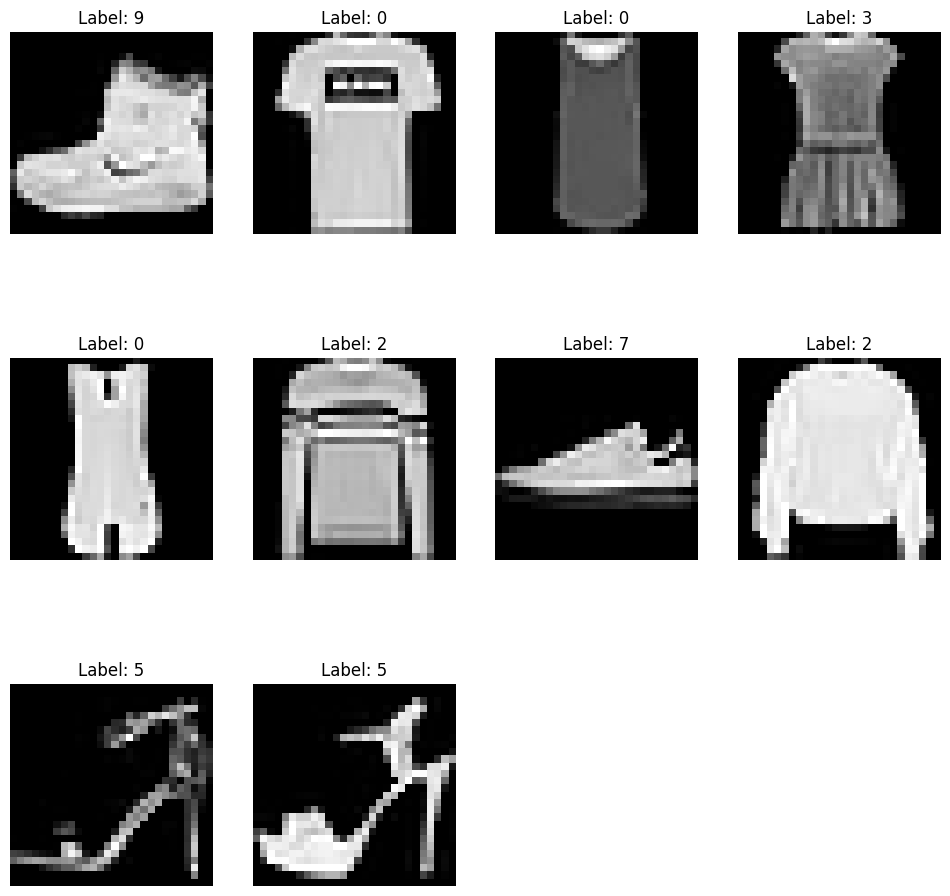

<ipython-input-21-875a3115494d>:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels_1d = labels.astype(np.int).reshape(-1)
<ipython-input-21-875a3115494d>:233: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.weights = np.asarray(self.weights)
<ipython-input-21-875a3115494d>:101: RuntimeWarning: overflow encountered in ex

Epoch 1: loss = 2.19 | acc = 0.137 | val_loss = 2.221 | val_acc = 0.118 |
Epoch 2: loss = 2.262 | acc = 0.122 | val_loss = 2.302 | val_acc = 0.098 |
Epoch 3: loss = 2.289 | acc = 0.115 | val_loss = 2.302 | val_acc = 0.102 |
Epoch 4: loss = 2.297 | acc = 0.109 | val_loss = 2.303 | val_acc = 0.1 |
Epoch 5: loss = 2.303 | acc = 0.1 | val_loss = 2.303 | val_acc = 0.1 |
Epoch 6: loss = 2.303 | acc = 0.102 | val_loss = 2.303 | val_acc = 0.105 |
Epoch 7: loss = 2.303 | acc = 0.111 | val_loss = 2.303 | val_acc = 0.1 |
Epoch 8: loss = 2.303 | acc = 0.1 | val_loss = 2.302 | val_acc = 0.1 |
Epoch 9: loss = 2.303 | acc = 0.1 | val_loss = 2.302 | val_acc = 0.1 |
Epoch 10: loss = 2.303 | acc = 0.106 | val_loss = 2.302 | val_acc = 0.1 |


KeyboardInterrupt: ignored

In [ ]:
fashion_mnist_x_train, fashion_mnist_x_test, fashion_mnist_y_train, fashion_mnist_y_test = load_and_preprocess_dataset("fashion_mnist", normalize=False)
model = MLP(fashion_mnist_x_train ,
            fashion_mnist_y_train,
            fashion_mnist_x_test,
            fashion_mnist_y_test,
            num_hidden_layers=2,num_neurons=128)

model.train(batch_size=64,epochs=10,lr=0.1)

## Experiment 6: Introducing CNN

Using PyTorch, create a convolutional neural network (CNN) with 2 convolutional and 2 fully connected layers.
Although you are free in your choice of the hyperparameters of the convolutional layers, set the number of units
in the fully connected layers to be 128. Also, set the activations in all of the layers to be ReLU. Train this CNN
on the Fashion MNIST dataset. Does using a CNN increase/decrease the accuracy compared to using MLPs?
Provide comments on your results.

In [ ]:
import math

def calculate_output_dimensions(image_dimension, kernel_size, stride, padding):
    # Calculate the output dimensions
    output = math.floor((image_dimension + 2 * padding - kernel_size) / stride) + 1

    output = math.floor(output / 2)

    return output

In [ ]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, image_dimesions = 28, channels=1):
        super(CNN, self).__init__()
        self.image_dimesions = image_dimesions
        # Define the convolutional layer
        self.conv1 = nn.Conv2d(channels, 512, kernel_size=7, stride=2, padding=3)
        self.relu1 = nn.ReLU()
        # Define the pooling layer
        self.pool1 = nn.MaxPool2d(2, 2)

        self.new_dimesions = calculate_output_dimensions(self.image_dimesions, 7, 2, 3)

        # Define the second convolutional layer
        self.conv2 = nn.Conv2d(512, 1024, kernel_size=5, stride=2, padding=1)
        self.relu2 = nn.ReLU()
        # Define the BatchNorm2d layer
        self.bn2 = nn.BatchNorm2d(1024)

        # Define the second pooling layer
        self.pool2 = nn.MaxPool2d(2, 2)

        self.new_dimesions = calculate_output_dimensions(self.new_dimesions, 5, 2, 1)

        # Define first fully connected layer
        self.fc1 = nn.Linear(int(1024 * self.new_dimesions * self.new_dimesions), 128)
        self.relu3 = nn.ReLU()

        # Define second fully connected layer
        self.fc2 = nn.Linear(128, 128)
        self.relu4 = nn.ReLU()

        # Output
        self.fc3 = nn.Linear(128, 10)

        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Apply the convolutional layer
        x = self.conv1(x)
        # Apply the ReLU activation function
        x = self.relu1(x)

        # Apply the first pooling layer
        x = self.pool1(x)

        # Apply the second convolutional layer
        x = self.conv2(x)
        # Apply the ReLU activation function
        x = self.relu2(x)

        # Apply the BatchNorm2d layer
        x = self.bn2(x)

        # Apply the second pooling layer
        x = self.pool2(x)

        # Flatten the output of the pooling layer
        x = x.view(-1, int(1024 * self.new_dimesions * self.new_dimesions ))

        # Apply the first fully connected layer
        x = self.fc1(x)
        # Apply the ReLU activation function
        x = self.relu3(x)

        # Apply the second fully connected layer
        x = self.fc2(x)
        # Apply the ReLU activation function
        x = self.relu4(x)

        # Apply the final fully connected layer
        x = self.fc3(x)

        # Apply the softmax layer
        x = self.softmax(x)

        # Return the output of the fully connected layer
        return x

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

def train_CNN(batch_size, training_set, trainloader, test_set, testloader, optimizer, num_epochs, cnn):
    train_accuracies = []
    # Define the loss function
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        # Training
        cnn.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for batch in trainloader:
            inputs, labels = batch
            optimizer.zero_grad()
            inputs = inputs.to('cuda')
            labels = labels.to('cuda')
            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        average_loss = running_loss / len(trainloader)
        train_accuracies.append(train_accuracy)

        # Validation
        cnn.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for batch in testloader:
                inputs, labels = batch
                inputs = inputs.to('cuda')
                labels = labels.to('cuda')
                outputs = cnn(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_accuracy = 100 * val_correct / val_total
        average_val_loss = val_loss / len(testloader)

        # Print the training and validation metrics for this epoch
        print(f"Epoch {epoch + 1}/{num_epochs} - "
              f"Train Loss: {average_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
              f"Validation Loss: {average_val_loss:.4f}, Validation Acc: {val_accuracy:.2f}%")

    return train_accuracies

## FMNIST using ADAM optimizer.

In [ ]:
# Define transform to convert images to tensors and normalize
transform_FMNIST = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Define batch size
batch_size = 64

# Load the Fashion MNIST dataset
FMNIST_training_set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                            download=True,
                                            train=True,
                                            transform=transform_FMNIST)

FMINIST_trainloader = torch.utils.data.DataLoader(FMNIST_training_set,
                                                 batch_size=batch_size,
                                                 shuffle=True,
                                                 num_workers=2)

FMNIST_test_set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                        download=True,
                                        train=False,
                                        transform=transform_FMNIST)

FMINIST_testloader = torch.utils.data.DataLoader(FMNIST_test_set,
                                                batch_size=batch_size,
                                                shuffle=False,
                                                num_workers=2)

# Define the CNN
cnn = CNN(channels=1, image_dimesions=28)
cnn = cnn.to('cuda')

# Define the optimizer
optimizer = optim.Adam(cnn.parameters(), lr=0.001)  # Make sure to create the optimizer after defining the CNN

num_epochs = 25  # You can change this as needed

# Call the train_CNN function
trained_cnn = train_CNN(batch_size, FMNIST_training_set, FMINIST_trainloader, FMNIST_test_set, FMINIST_testloader, optimizer, num_epochs, cnn)

Epoch 1/25 - Train Loss: 1.6462, Train Acc: 81.76%, Validation Loss: 1.6451, Validation Acc: 81.62%
Epoch 2/25 - Train Loss: 1.6103, Train Acc: 85.08%, Validation Loss: 1.6128, Validation Acc: 84.75%
Epoch 3/25 - Train Loss: 1.6031, Train Acc: 85.77%, Validation Loss: 1.6122, Validation Acc: 84.82%
Epoch 4/25 - Train Loss: 1.5881, Train Acc: 87.27%, Validation Loss: 1.6030, Validation Acc: 85.71%
Epoch 5/25 - Train Loss: 1.5887, Train Acc: 87.18%, Validation Loss: 1.6025, Validation Acc: 85.76%
Epoch 6/25 - Train Loss: 1.5848, Train Acc: 87.56%, Validation Loss: 1.6016, Validation Acc: 85.94%
Epoch 7/25 - Train Loss: 1.5914, Train Acc: 86.96%, Validation Loss: 1.6021, Validation Acc: 85.86%
Epoch 8/25 - Train Loss: 1.5782, Train Acc: 88.25%, Validation Loss: 1.5955, Validation Acc: 86.51%
Epoch 9/25 - Train Loss: 1.5733, Train Acc: 88.75%, Validation Loss: 1.5945, Validation Acc: 86.71%
Epoch 10/25 - Train Loss: 1.5758, Train Acc: 88.48%, Validation Loss: 1.5921, Validation Acc: 86.90%

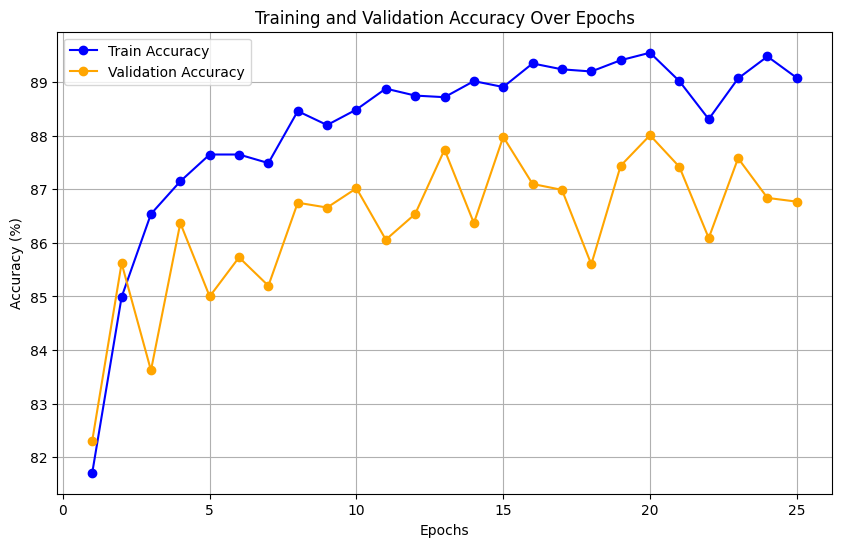

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = range(1, 26)
train_acc = [81.71, 84.99, 86.54, 87.15, 87.65, 87.65, 87.49, 88.46, 88.20, 88.49, 88.88, 88.75, 88.72, 89.02, 88.91, 89.35, 89.24, 89.20, 89.41, 89.55, 89.02, 88.31, 89.07, 89.48, 89.08]
val_acc = [82.31, 85.62, 83.62, 86.37, 85.00, 85.73, 85.20, 86.75, 86.66, 87.02, 86.06, 86.54, 87.74, 86.37, 87.98, 87.10, 86.99, 85.60, 87.44, 88.01, 87.42, 86.09, 87.58, 86.84, 86.77]

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o', color='blue')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o', color='orange')

# Customize the graph
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)

# Show the graph
plt.show()


## CIFAR using ADAM optimizer.

In [ ]:
# Define transform to convert images to tensors and normalize
transform_CIFAR_10 = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
    # Numbers from normalization comes from this link:
    # https://www.kaggle.com/code/fanbyprinciple/cifar10-explanation-with-pytorch
        ])

batch_size = 64

CIFAR_10_training_set = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform_CIFAR_10)
CIFAR_10_trainloader = torch.utils.data.DataLoader(CIFAR_10_training_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)
CIFAR_10_testing_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_CIFAR_10)
CIFAR_10_testloader = torch.utils.data.DataLoader(CIFAR_10_testing_set,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  num_workers=2)

# Define the CNN
cnn = CNN(channels=3, image_dimesions=32)
cnn = cnn.to('cuda')

# Define the optimizer
optimizer = optim.Adam(cnn.parameters(), lr=0.001)  # Make sure to create the optimizer after defining the CNN

num_epochs = 25  # You can change this as needed

# Call the train_CNN function
trained_cnn = train_CNN(batch_size, CIFAR_10_training_set, CIFAR_10_trainloader, CIFAR_10_testing_set, CIFAR_10_testloader, optimizer, num_epochs, cnn)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/25 - Train Loss: 2.0480, Train Acc: 40.76%, Validation Loss: 1.9880, Validation Acc: 47.14%
Epoch 2/25 - Train Loss: 1.9572, Train Acc: 49.92%, Validation Loss: 1.9340, Validation Acc: 52.31%
Epoch 3/25 - Train Loss: 1.9368, Train Acc: 51.93%, Validation Loss: 1.9797, Validation Acc: 47.75%
Epoch 4/25 - Train Loss: 1.9042, Train Acc: 55.40%, Validation Loss: 1.8955, Validation Acc: 56.35%
Epoch 5/25 - Train Loss: 1.9138, Train Acc: 54.39%, Validation Loss: 1.9140, Validation Acc: 54.45%
Epoch 6/25 - Train Loss: 1.8739, Train Acc: 58.50%, Validation Loss: 1.8915, Validation Acc: 56.71%
Epoch 7/25 - Train Loss: 1.8738, Train Acc: 58.41%, Validation Loss: 1.8778, Validation Acc: 58.09%
Epoch 8/25 - Train Loss: 1.8513, Train Acc: 60.77%, Validation Loss: 1.8774, Validation Acc: 57.97%
Epoch 9/25 - Train Loss: 1.8422, Train Acc: 61.62%, Validation Loss: 1.8692, Validation Acc: 59.07%
Epoch 10/25 - Train Loss

In [ ]:
# Define transform to convert images to tensors and normalize
transform_CIFAR_10 = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
    # Numbers from normalization comes from this link:
    # https://www.kaggle.com/code/fanbyprinciple/cifar10-explanation-with-pytorch
        ])

batch_size = 64

CIFAR_10_training_set = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform_CIFAR_10)
CIFAR_10_trainloader = torch.utils.data.DataLoader(CIFAR_10_training_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)
CIFAR_10_testing_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_CIFAR_10)
CIFAR_10_testloader = torch.utils.data.DataLoader(CIFAR_10_testing_set,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  num_workers=2)

# Define the CNN
cnn = CNN(channels=3, image_dimesions=32)
cnn = cnn.to('cuda')

# Define the optimizer
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.8)  # Make sure to create the optimizer after defining the CNN

num_epochs = 100  # You can change this as needed

# Call the train_CNN function
trained_cnn = train_CNN(batch_size, CIFAR_10_training_set, CIFAR_10_trainloader, CIFAR_10_testing_set, CIFAR_10_testloader, optimizer, num_epochs, cnn)

100%|██████████| 170498071/170498071 [00:02<00:00, 59512626.55it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/100 - Train Loss: 2.2561, Train Acc: 21.26%, Validation Loss: 2.2005, Validation Acc: 27.82%
Epoch 2/100 - Train Loss: 2.1492, Train Acc: 33.12%, Validation Loss: 2.0943, Validation Acc: 39.36%
Epoch 3/100 - Train Loss: 2.0602, Train Acc: 42.67%, Validation Loss: 2.0301, Validation Acc: 46.17%
Epoch 4/100 - Train Loss: 2.0074, Train Acc: 47.94%, Validation Loss: 2.0007, Validation Acc: 48.33%
Epoch 5/100 - Train Loss: 1.9721, Train Acc: 51.26%, Validation Loss: 1.9803, Validation Acc: 50.10%
Epoch 6/100 - Train Loss: 1.9458, Train Acc: 54.02%, Validation Loss: 1.9654, Validation Acc: 51.20%
Epoch 7/100 - Train Loss: 1.9249, Train Acc: 56.04%, Validation Loss: 1.9510, Validation Acc: 52.73%
Epoch 8/100 - Train Loss: 1.9065, Train Acc: 57.77%, Validation Loss: 1.9487, Validation Acc: 52.31%
Epoch 9/100 - Train Loss: 1.8923, Train Acc: 59.52%, Validation Loss: 1.9398, Validation Acc: 53.71%
Ep

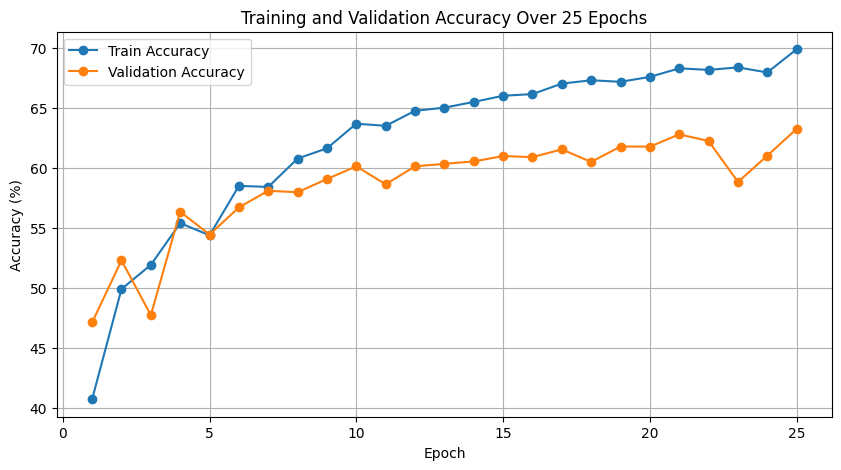

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = [40.76, 49.92, 51.93, 55.40, 54.39, 58.50, 58.41, 60.77, 61.62, 63.67, 63.49, 64.74, 65.00, 65.48, 65.99, 66.13, 67.00, 67.28, 67.15, 67.56, 68.27, 68.14, 68.35, 67.93, 69.86]
validation_accuracy = [47.14, 52.31, 47.75, 56.35, 54.45, 56.71, 58.09, 57.97, 59.07, 60.12, 58.63, 60.12, 60.33, 60.53, 60.98, 60.89, 61.53, 60.49, 61.77, 61.76, 62.78, 62.23, 58.82, 61.01, 63.24]

# Create a list of epoch numbers (1 to 25)
epochs = list(range(1, 26))

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label="Train Accuracy", marker='o')
plt.plot(epochs, validation_accuracy, label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy Over 25 Epochs")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import torch.optim as optim

def test_sgd_momentumFMNIST(num_epochs, cnn):
    # Loop over different momentum values
    momentum_accuracies = {}
    for momentum in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:

      # Load the Fashion MNIST dataset
        FMNIST_training_set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                                    download=True,
                                                    train=True,
                                                    transform=transform_FMNIST)

        FMINIST_trainloader = torch.utils.data.DataLoader(FMNIST_training_set,
                                                         batch_size=batch_size,
                                                         shuffle=True,
                                                         num_workers=2)

        FMNIST_test_set = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',
                                                download=True,
                                                train=False,
                                                transform=transform_FMNIST)

        FMINIST_testloader = torch.utils.data.DataLoader(FMNIST_test_set,
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        num_workers=2)
        # Define the SGD optimizer with the current momentum
        optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=momentum)

        print(f"Testing SGD optimizer with momentum {momentum}...")

        # Train the CNN with the current optimizer
        train_accuracies = train_CNN(batch_size, FMNIST_training_set, FMINIST_trainloader, FMNIST_test_set, FMINIST_testloader, optimizer, num_epochs, cnn)

        momentum_accuracies[momentum] = train_accuracies

    for momentum in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        plt.plot(range(1, num_epochs + 1), momentum_accuracies[momentum], label=f'Momentum {momentum}')

    plt.xlabel('Epoch')
    plt.ylabel('Training Accuracy (%)')
    plt.title('Training Accuracy vs. Epoch for Different Momentums')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
transform_FMNIST = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Define batch size
batch_size = 64

cnn = CNN(channels=1, image_dimesions=28)
cnn = cnn.to('cuda')
test_sgd_momentumFMNIST(25, cnn)

Testing SGD optimizer with momentum 0.0...
Epoch 1/25 - Train Loss: 2.2974, Train Acc: 21.93%, Validation Loss: 2.2941, Validation Acc: 25.60%
Epoch 2/25 - Train Loss: 2.2898, Train Acc: 29.12%, Validation Loss: 2.2854, Validation Acc: 31.18%
Epoch 3/25 - Train Loss: 2.2791, Train Acc: 33.50%, Validation Loss: 2.2726, Validation Acc: 34.16%
Epoch 4/25 - Train Loss: 2.2603, Train Acc: 35.13%, Validation Loss: 2.2453, Validation Acc: 35.57%
Epoch 5/25 - Train Loss: 2.2204, Train Acc: 37.12%, Validation Loss: 2.1885, Validation Acc: 38.31%
Epoch 6/25 - Train Loss: 2.1485, Train Acc: 40.14%, Validation Loss: 2.1142, Validation Acc: 41.58%
Epoch 7/25 - Train Loss: 2.0765, Train Acc: 47.56%, Validation Loss: 2.0431, Validation Acc: 53.41%
Epoch 8/25 - Train Loss: 1.9967, Train Acc: 59.28%, Validation Loss: 1.9538, Validation Acc: 64.88%
Epoch 9/25 - Train Loss: 1.9119, Train Acc: 67.40%, Validation Loss: 1.8799, Validation Acc: 68.84%
Epoch 10/25 - Train Loss: 1.8507, Train Acc: 70.26%, Vali

KeyboardInterrupt: ignored

In [ ]:
import torch.optim as optim

def test_sgd_momentumCIFAR(num_epochs, cnn):
    # Loop over different momentum values
    momentum_accuracies = {}
    for momentum in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:

        # Load the Fashion MNIST dataset
        transform_CIFAR_10 = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize((0.4915, 0.4823, 0.4468),
                         (0.2470, 0.2435, 0.2616))
    # Numbers from normalization comes from this link:
    # https://www.kaggle.com/code/fanbyprinciple/cifar10-explanation-with-pytorch
        ])

        batch_size = 64

        CIFAR_10_training_set = torchvision.datasets.CIFAR10(root='./data',
                                                train=True,
                                                download=True,
                                                transform=transform_CIFAR_10)
        CIFAR_10_trainloader = torch.utils.data.DataLoader(CIFAR_10_training_set,
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           num_workers=2)

        CIFAR_10_testing_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                               download=True, transform=transform_CIFAR_10)
        CIFAR_10_testloader = torch.utils.data.DataLoader(CIFAR_10_testing_set,
                                                          batch_size=batch_size,
                                                          shuffle=False,
                                                          num_workers=2)

        cnn = CNN(channels=3, image_dimesions=32)
        cnn = cnn.to('cuda')
        # Define the SGD optimizer with the current momentum
        optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=momentum)

        print(f"Testing SGD optimizer with momentum {momentum}...")

        # Train the CNN with the current optimizer
        train_accuracies = train_CNN(batch_size, CIFAR_10_training_set, CIFAR_10_trainloader, CIFAR_10_testing_set, CIFAR_10_testloader, optimizer, num_epochs, cnn)

        momentum_accuracies[momentum] = train_accuracies

    for momentum in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        plt.plot(range(1, num_epochs + 1), momentum_accuracies[momentum], label=f'Momentum {momentum}')

    plt.xlabel('Epoch')
    plt.ylabel('Training Accuracy (%)')
    plt.title('Training Accuracy vs. Epoch for Different Momentums')
    plt.legend()
    plt.grid(True)
    plt.show()

100%|██████████| 170498071/170498071 [00:02<00:00, 71933185.37it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Testing SGD optimizer with momentum 0.0...
Epoch 1/20 - Train Loss: 2.2991, Train Acc: 11.99%, Validation Loss: 2.2943, Validation Acc: 17.23%
Epoch 2/20 - Train Loss: 2.2898, Train Acc: 19.44%, Validation Loss: 2.2837, Validation Acc: 21.06%
Epoch 3/20 - Train Loss: 2.2765, Train Acc: 21.41%, Validation Loss: 2.2642, Validation Acc: 21.97%
Epoch 4/20 - Train Loss: 2.2574, Train Acc: 22.30%, Validation Loss: 2.2445, Validation Acc: 22.86%
Epoch 5/20 - Train Loss: 2.2374, Train Acc: 23.55%, Validation Loss: 2.2248, Validation Acc: 24.37%
Epoch 6/20 - Train Loss: 2.2180, Train Acc: 25.07%, Validation Loss: 2.2055, Validation Acc: 26.52%
Epoch 7/20 - Train Loss: 2.1996, Train Acc: 26.96%, Validation Loss: 2.1867, Validation Acc: 28.42%
Epoch 8/20 - Train Loss: 2.1831, Train Acc: 28.51%, Validation Loss: 2.1721, Validation Acc: 30.11%
Epoch 9/20 - Train Loss: 2.1686, Train Acc: 30.07%, Validation Loss:

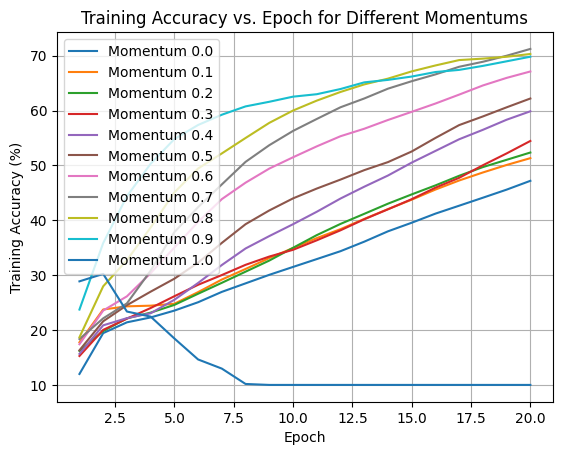

In [ ]:

# Define the CNN
cnn = CNN(channels=3, image_dimesions=32)
cnn = cnn.to('cuda')

test_sgd_momentumCIFAR(20, cnn)


# Number 9

In [ ]:
import torch
import torchvision.models as models

# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Specify the ResNet version you want (e.g., ResNet-18, ResNet-50, etc.)
model = models.resnet50(pretrained=True)
model = nn.Sequential(*list(model.children())[:-1])  # Remove the last fully connected layer

batch_size = 64
CIFAR_10_training_set = torchvision.datasets.CIFAR10(root='./data',
                                                train=True,
                                                download=True,
                                                transform=transform_CIFAR_10)
CIFAR_10_trainloader = torch.utils.data.DataLoader(CIFAR_10_training_set,
                                                   batch_size=batch_size,
                                                   shuffle=True,
                                                   num_workers=2)

CIFAR_10_testing_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                                   download=True, transform=transform_CIFAR_10)
CIFAR_10_testloader = torch.utils.data.DataLoader(CIFAR_10_testing_set,
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  num_workers=2)

# Define a custom classifier with two fully connected layers
classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(2048, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 10)
).to(device)

# Combine the ResNet feature extractor and the custom classifier
model.fc = classifier

# Put the entire model on the GPU
model.to(device)

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training loop
num_epochs = 40  # You can adjust the number of epochs
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(CIFAR_10_trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(CIFAR_10_trainloader)}, Train Accuracy: {(100 * correct / total):.2f}%")

    # Evaluation on the test set after each epoch
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in CIFAR_10_testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on CIFAR-10 test set after epoch {epoch + 1}: {accuracy:.2f}%')

# Final test accuracy
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in CIFAR_10_testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Final accuracy on CIFAR-10 test set: {accuracy:.2f}%')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 81.5MB/s]


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.2244090189409378, Train Accuracy: 57.94%
Accuracy on CIFAR-10 test set after epoch 1: 77.88%
Epoch 2, Loss: 0.6198589304447784, Train Accuracy: 80.11%
Accuracy on CIFAR-10 test set after epoch 2: 81.87%
Epoch 3, Loss: 0.4337299216700637, Train Accuracy: 85.98%
Accuracy on CIFAR-10 test set after epoch 3: 82.64%
Epoch 4, Loss: 0.31487677347324694, Train Accuracy: 89.82%
Accuracy on CIFAR-10 test set after epoch 4: 83.38%
Epoch 5, Loss: 0.23715059997518653, Train Accuracy: 92.45%
Accuracy on CIFAR-10 test set after epoch 5: 83.24%
Epoch 6, Loss: 0.18558451162694056, Train Accuracy: 94.18%
Accuracy on CIFAR-10 test set after epoch 6: 82.95%
Epoch 7, Loss: 0.14867209320378197, Train Accuracy: 95.28%
Accuracy on CIFAR-10 test set after epoch 7: 83.44%
Epoch 8, Loss: 0.12153757818619651, Train Accuracy: 96.13%
Accuracy on CIFAR-10 test set after epoch 8: 83.67%
Epoch 9, Loss: 0.1114966936726266, Trai

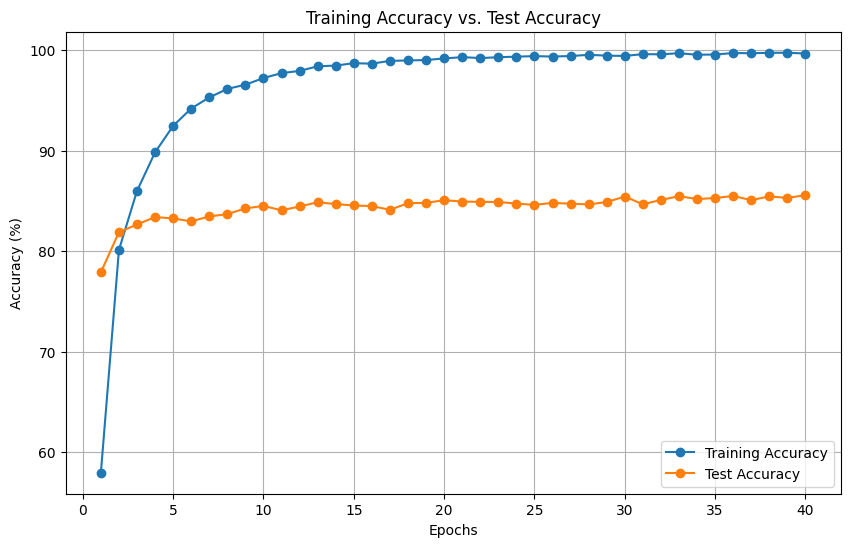

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 41))  # Epochs 1 to 40
train_accuracy = [
    57.94, 80.11, 85.98, 89.82, 92.45, 94.18, 95.28, 96.13, 96.55, 97.21,
    97.70, 97.92, 98.38, 98.45, 98.69, 98.64, 98.92, 98.96, 99.00, 99.16,
    99.29, 99.20, 99.28, 99.34, 99.39, 99.35, 99.40, 99.52, 99.44, 99.41,
    99.59, 99.57, 99.68, 99.53, 99.55, 99.70, 99.68, 99.72, 99.73, 99.65
]

test_accuracy = [
    77.88, 81.87, 82.64, 83.38, 83.24, 82.95, 83.44, 83.67, 84.24, 84.49,
    84.05, 84.43, 84.85, 84.67, 84.53, 84.47, 84.10, 84.76, 84.79, 85.06,
    84.92, 84.89, 84.88, 84.72, 84.59, 84.79, 84.71, 84.64, 84.87, 85.42,
    84.65, 85.08, 85.46, 85.17, 85.27, 85.48, 85.06, 85.44, 85.28, 85.56
]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, test_accuracy, label='Test Accuracy', marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs. Test Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()